In [168]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

churn = pd.read_csv('./Cleaned_ML.csv')
churn.drop(['Unnamed: 0'], axis=1, inplace=True)
churn.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M
0,1,45,3,1,1,2,0,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,1,49,5,3,0,0,0,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0
2,1,51,3,3,1,3,0,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,1,40,3,0,1,2,0,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1
4,1,44,2,3,1,1,0,36,3,1,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0,1


Text(0, 0.5, 'PCA 2')

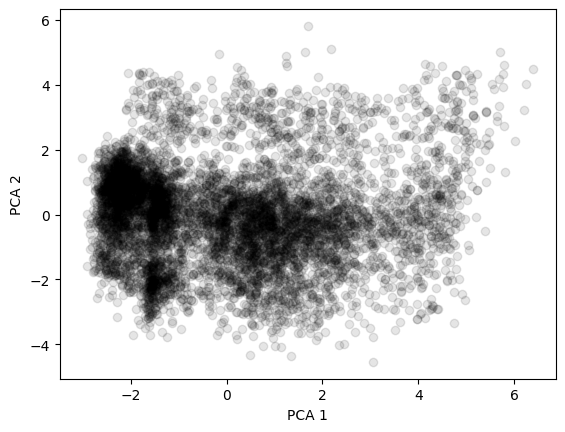

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X = StandardScaler().fit_transform(churn)

pca = PCA(n_components=21)
principalComp = pca.fit_transform(X)

PCA_components = pd.DataFrame(principalComp)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


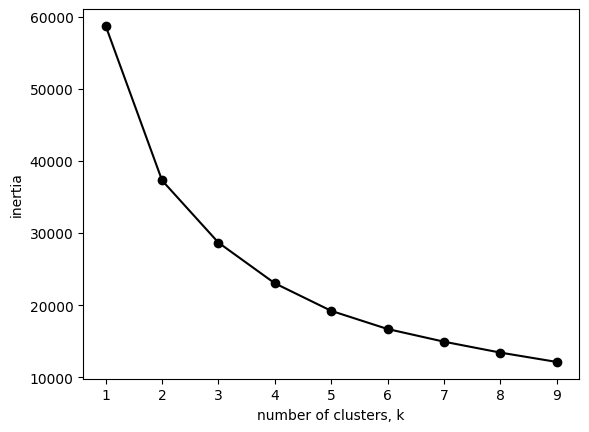

In [170]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,n_init=10)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

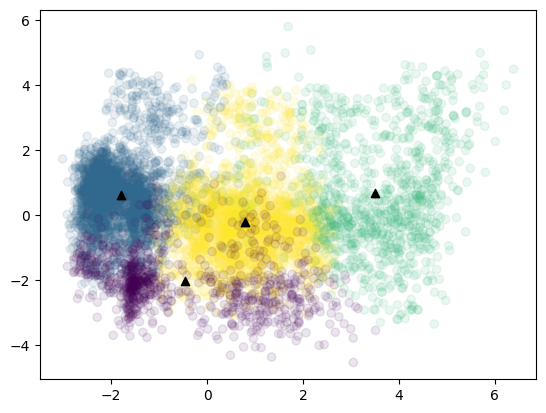

In [171]:
PCA_components.columns = PCA_components.columns.astype(str)
model = KMeans(n_clusters=4,n_init=10,init='k-means++').fit(PCA_components)
cluster_labels = pd.Series(model.labels_, name='cluster')
churn = churn.join(cluster_labels.to_frame())
plt.scatter(PCA_components["0"], PCA_components["1"], alpha=.1, c=cluster_labels)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
 marker='^', color='black')


In [172]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics


db = DBSCAN(eps=0.8, min_samples=2).fit(PCA_components.iloc[:,:3])
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 19


In [173]:
cluster_db = pd.Series(db.labels_, name='cluster_db')
churn = churn.join(cluster_db.to_frame())
print(churn['cluster_db'].value_counts())

 0    7047
-1      19
 5       4
 6       3
 1       2
 2       2
 3       2
 4       2
Name: cluster_db, dtype: int64


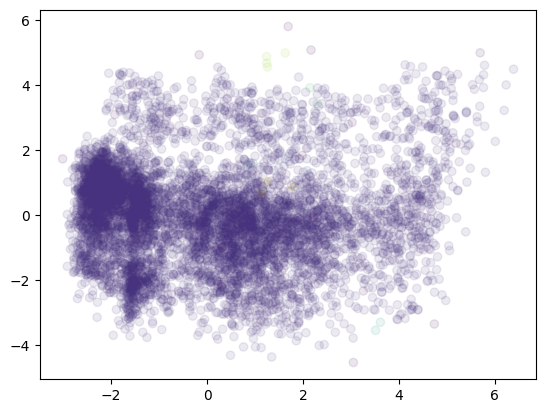

In [174]:
plt.scatter(PCA_components["0"], PCA_components["1"], alpha=.1, c=cluster_db)

In [175]:
# #sns.catplot(data=churn, x='Customer_Age',y='Avg_Utilization_Ratio',col='cluster', kind='bar')
# sns.catplot(data=churn, x='Customer_Age',col='cluster', kind='count')
# sns.catplot(
#     data=churn, y="Customer_Age", x="cluster",
#     kind="violin", bw=.25, cut=0, split=True,
# )
